In [1]:
# Projet 3_02   

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn import decomposition
import seaborn as sns
from sklearn import cluster, metrics
%matplotlib inline
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [10, 5]  # taille des graphiques en pouces

In [3]:
def correlation_matrice(df):

    mask=np.triu(np.ones_like(df.corr(),dtype=bool))
    sns.heatmap(df.corr(),mask=mask,center=0,cmap='RdBu',linewidths=1,annot=True,fmt='.2f',vmin=-1,vmax=1)
    plt.title('Carte des corrélations',fontsize=15,fontweight="bold")
    plt.show()

In [4]:
data=pd.read_csv(r"C:\Users\serge\OneDrive\Documents\Documents\DATA SCIENTIST\P3\data_P3.csv", low_memory=False)

In [5]:
data.shape

(49903, 23)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49903 entries, 0 to 49902
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   code                                     49903 non-null  int64  
 1   url                                      49903 non-null  object 
 2   created_datetime                         49903 non-null  object 
 3   product_name                             49903 non-null  object 
 4   brands                                   49903 non-null  object 
 5   categories                               49903 non-null  object 
 6   ingredients_text                         49903 non-null  object 
 7   additives_n                              49903 non-null  float64
 8   ingredients_from_palm_oil_n              49903 non-null  float64
 9   ingredients_that_may_be_from_palm_oil_n  49903 non-null  float64
 10  nutrition_grade_fr                       46739

In [7]:
data_cor=data.iloc[:,14:21]

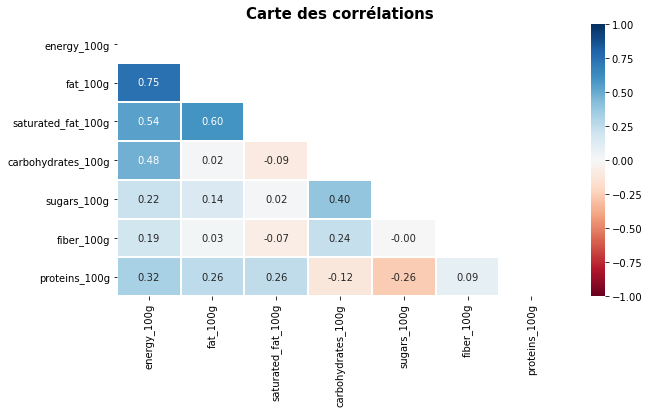

In [8]:
correlation_matrice(data_cor)

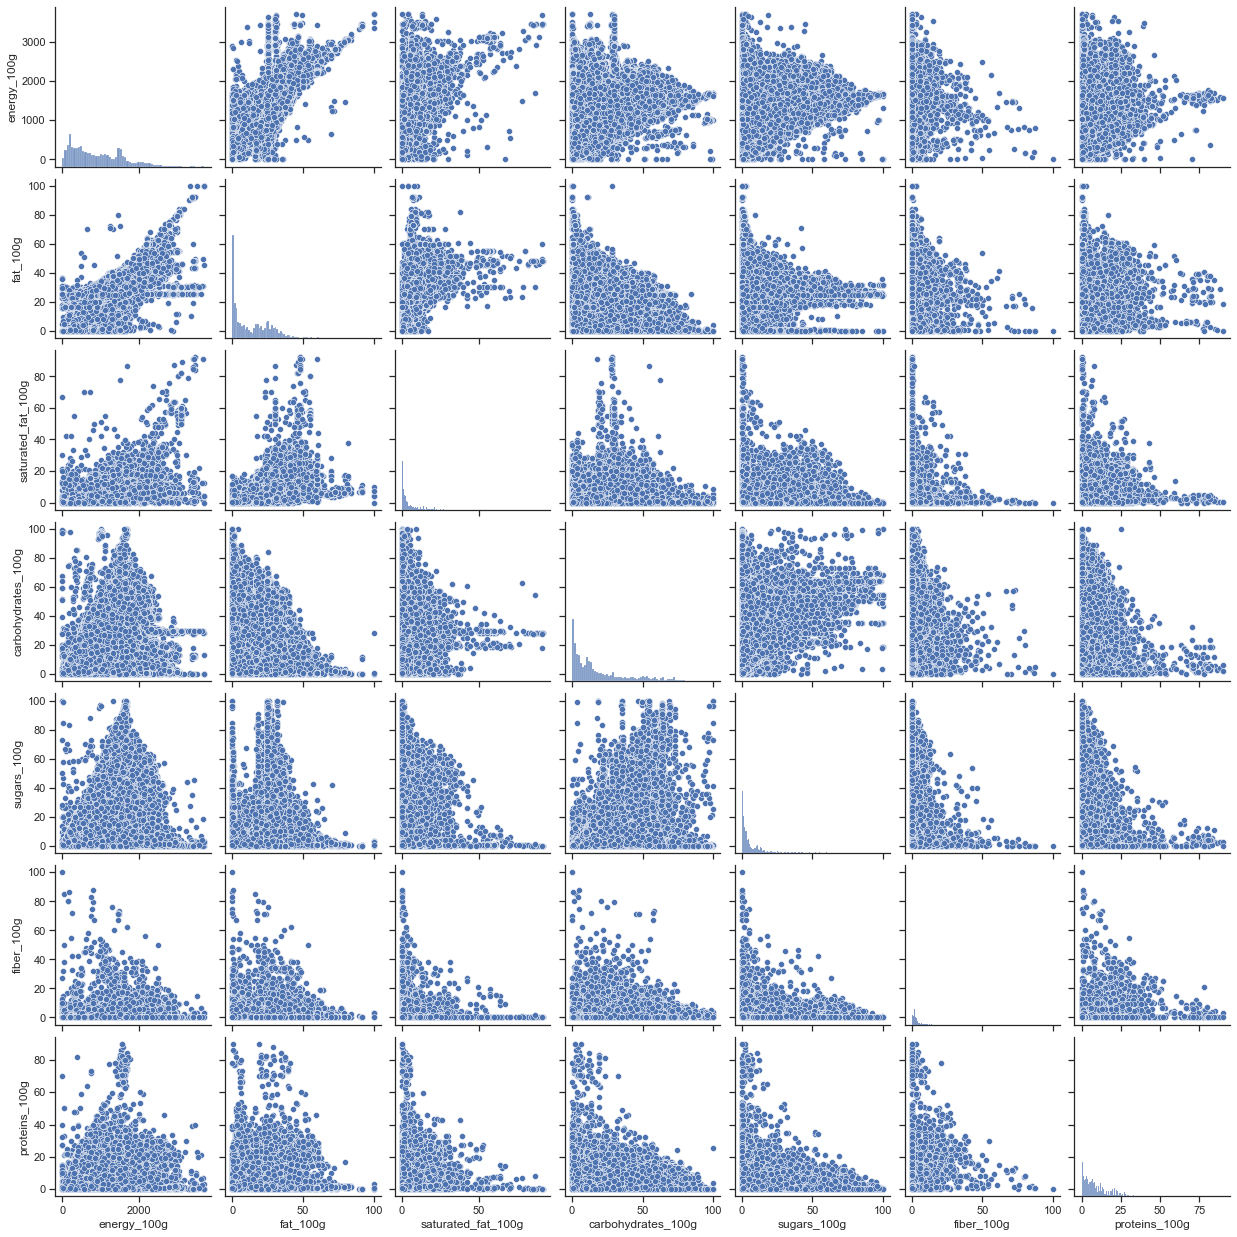

In [9]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data_cor)
plt.show()

## 1. Corrélation entre energy_100g et fat_100g

####  1.1 Visualisation des données

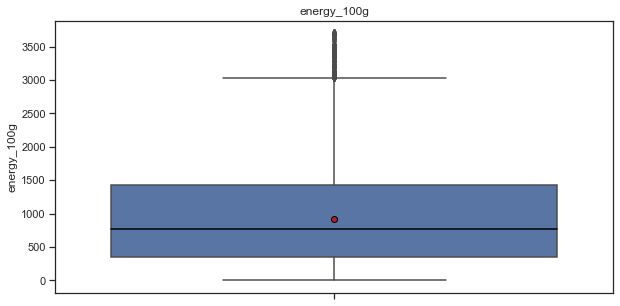

In [10]:
# Propriétés graphiques    
_data=data.copy()
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}           
                     
 
sns.boxplot( y=_data['energy_100g'], showfliers=True,medianprops=medianprops, showmeans=True, meanprops=meanprops)
plt.title("energy_100g")
plt.ylabel('energy_100g')

plt.show()

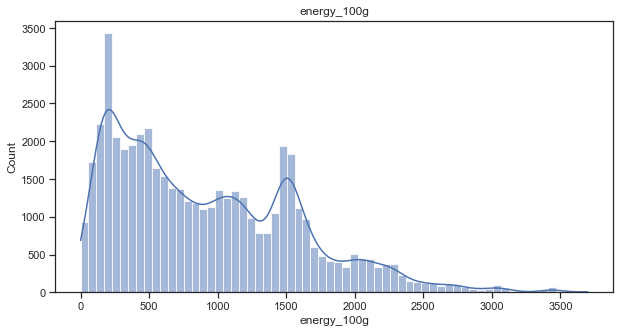

In [11]:
# Histogramme et Densité de probabilité de energy_100g

sns.histplot(
    _data["energy_100g"], 
    kde = True).set_title("energy_100g");

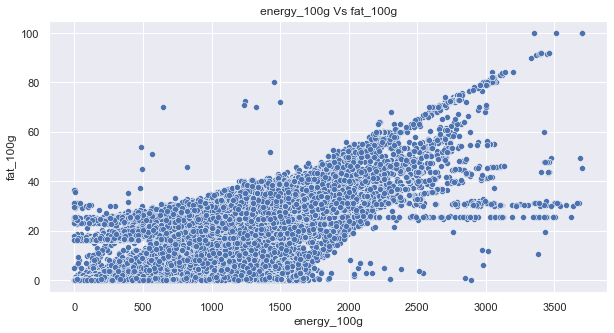

In [12]:
sns.set()
ax = sns.scatterplot(x="energy_100g", y="fat_100g", data=_data)
ax.set(xlabel='energy_100g', ylabel='fat_100g')
plt.title('energy_100g Vs fat_100g');

*****ce nuage de points nous fait penser à une droite*****

### 1.2 Régression linéaire simple sur ce nuage de points 

In [13]:
reg_simp = smf.ols('fat_100g ~ energy_100g', data=_data).fit()

In [14]:
print(reg_simp.summary())

                            OLS Regression Results                            
Dep. Variable:               fat_100g   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                 6.399e+04
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:02:06   Log-Likelihood:            -1.8254e+05
No. Observations:               49903   AIC:                         3.651e+05
Df Residuals:                   49901   BIC:                         3.651e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.1493      0.071     -2.094      

Les p-valeurs sont inférieures à 5 %. À un niveau de test de 5 %, on rejette donc l'hypothèse selon laquelle le paramètre est égal à 0 : les paramètres sont donc significativement différents de 0. Ici, on voit que la variable fat_100g est significative.

### 1.3 Droite de régression

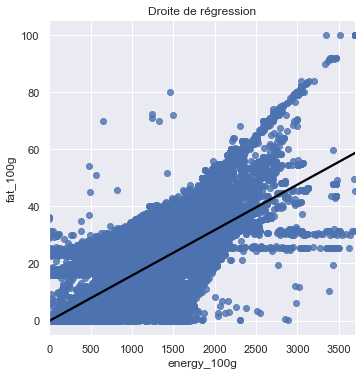

In [15]:
ax = sns.lmplot(x="energy_100g", y="fat_100g", data=_data, ci=None, line_kws={'color':'black'})
ax.set(xlabel='energy_100g', ylabel='fat_100g')
plt.title('Droite de régression')
plt.show()

On peut également représenter les valeurs ajustées en fonction des valeurs observées :

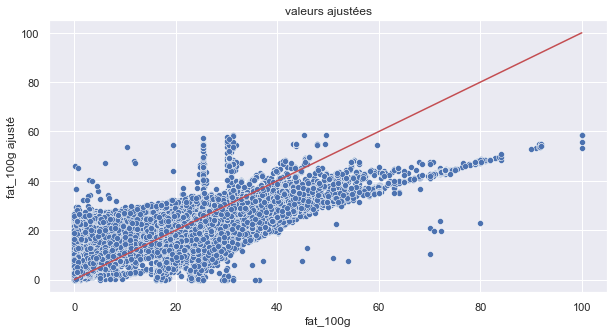

In [16]:
_data['fat_100g_ajust_s'] = reg_simp.predict()

X_plot = [_data['fat_100g'].min(), _data['fat_100g'].max()]

ax = sns.scatterplot(x="fat_100g", y="fat_100g_ajust_s", data=_data)
ax.set(xlabel='fat_100g', ylabel='fat_100g ajusté')
plt.plot(X_plot, X_plot, color='r')
plt.title("valeurs ajustées")
plt.show()

La droite qui s'affiche est la première bissectrice. Si le modèle était parfait, les valeurs réelles et les valeurs ajustées seraient égales, donc sur un tel graphique, les points seraient alignés sur la droite d'équation  𝑦=𝑥
 , soit la première bissectrice.

### 1.4 Résidus du modele

In [17]:
_data['residu_s'] = reg_simp.resid

on peut représenter l'histogramme de ces résidus.

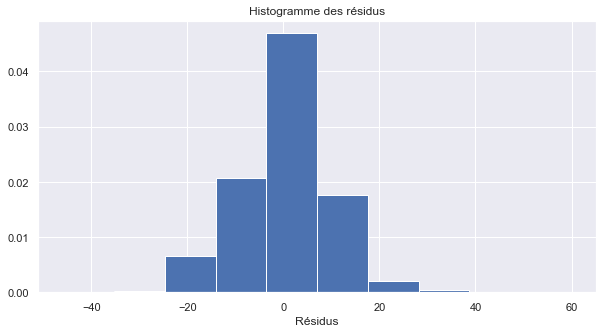

In [18]:
plt.hist(_data['residu_s'], density=True)
plt.xlabel('Résidus')
plt.title('Histogramme des résidus')
plt.show()

### 1.5 On pourrait utiliser la régression linéaire pour déterminer la quantité de fat_100g

In [19]:
a_prevoir = pd.DataFrame({'energy_100g':[3000]})
fat_100g_prev = reg_simp.predict(a_prevoir)
print(round(fat_100g_prev[0], 2))

47.6


### 2.1  Corrélation entre le pnns_groups_1 et l energy_100g

In [20]:
data_=data.copy()
data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49903 entries, 0 to 49902
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   code                                     49903 non-null  int64  
 1   url                                      49903 non-null  object 
 2   created_datetime                         49903 non-null  object 
 3   product_name                             49903 non-null  object 
 4   brands                                   49903 non-null  object 
 5   categories                               49903 non-null  object 
 6   ingredients_text                         49903 non-null  object 
 7   additives_n                              49903 non-null  float64
 8   ingredients_from_palm_oil_n              49903 non-null  float64
 9   ingredients_that_may_be_from_palm_oil_n  49903 non-null  float64
 10  nutrition_grade_fr                       46739

In [21]:
data_['pnns_groups_1'].unique()

array(['unknown', 'Beverages', 'Fruits and vegetables', 'Salty snacks',
       'Fat and sauces', 'Composite foods', 'Sugary snacks',
       'fruits-and-vegetables', 'Milk and dairy products',
       'Cereals and potatoes', 'Fish Meat Eggs', 'sugary-snacks',
       'cereals-and-potatoes'], dtype=object)

In [22]:
## uniformiser en minuscule et remplacer '-' par ' '
data_['pnns_groups_1']=data_['pnns_groups_1'].str.lower()
data_['pnns_groups_1']=data_['pnns_groups_1'].replace("-"," ",regex=True)
data_['pnns_groups_1'].nunique()

10

In [23]:
# nombre de produits par catégorie et 
data_.groupby('pnns_groups_1').agg({'product_name':'count','energy_100g':'mean','fat_100g':'mean','sugars_100g':'mean'}).reset_index() 


,pnns_groups_1,product_name,energy_100g,fat_100g,sugars_100g
0,beverages,4013,206.738546,1.338642,8.669712
1,cereals and potatoes,3839,1237.634746,4.887011,3.477456
2,composite foods,5189,681.557932,8.039168,2.398312
3,fat and sauces,2180,1158.560486,25.375697,6.164077
4,fish meat eggs,4910,860.748252,14.088871,0.972137
5,fruits and vegetables,3029,283.148397,2.115626,6.852006
6,milk and dairy products,5381,863.660537,15.114108,7.142046
7,salty snacks,802,1937.018990,27.477985,3.378784
8,sugary snacks,1537,1296.374437,13.279810,26.998962
9,unknown,19023,1092.362833,21.000120,12.537220


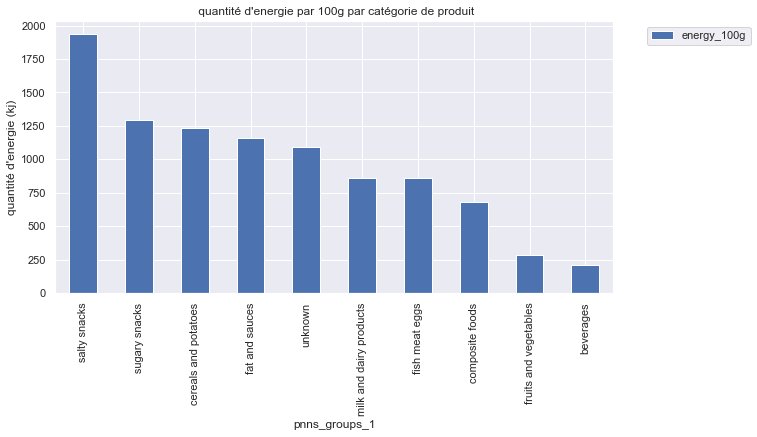

In [24]:
data_.groupby('pnns_groups_1').agg({'energy_100g':'mean',}).sort_values(by="energy_100g", ascending=False).plot(kind='bar',stacked=False)
plt.xlabel("pnns_groups_1")
plt.ylabel("quantité d'energie (kj)")
plt.title(" quantité d'energie par 100g par catégorie de produit")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')  # position de la legende
plt.show()

Y-a t-il un lien entre la catégorie de produits et la quantité d'énergie par 100 grammes ?

Il faut répondre à cette question pour voir si l'idée d'application est réalisable.

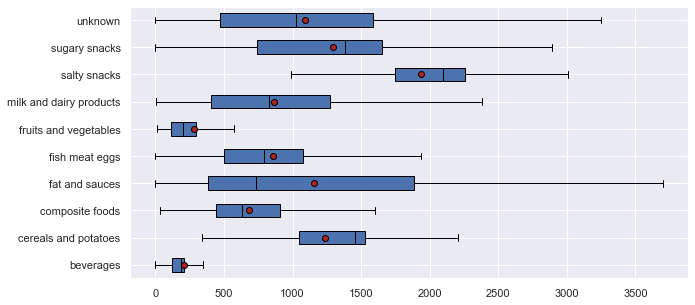

In [25]:
X = "pnns_groups_1" # qualitative
Y = "energy_100g" # quantitative

modalites = data_.sort_values(by=['pnns_groups_1'])["pnns_groups_1"].unique()

groupes = []
for m in modalites:
    groupes.append(data_[data_[X]==m][Y])

# Propriétés graphiques     
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

il y a des différences très importantes entre les différentes catégories. On voit notamment que les moyennes et les étendues de  ***fruits and vegetables*** et de ***beverage*** sont nettement inférieures à celles des autres catégories.
La question est de savoir si ces écarts sont significatifs ou pas.

C'est l'ANOVA qui nous permettra de répondre à cette question.

Hypothèse nulle (H0): Il n'y a pas de différence d' energy_100g pour ces catégories .Ils sont tous les mêmes.

Hypothèse alternative (H1): il y a une différence d' energy_100g  pour ces  catégories.

In [26]:
import statsmodels.formula.api as smf
anova_pnns_groups_1 = smf.ols('energy_100g~pnns_groups_1', data=data_).fit()
print(anova_pnns_groups_1.summary())

                            OLS Regression Results                            
Dep. Variable:            energy_100g   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     1922.
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:02:08   Log-Likelihood:            -3.8793e+05
No. Observations:               49903   AIC:                         7.759e+05
Df Residuals:                   49893   BIC:                         7.760e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

La p-valeur de ce test ( 0.00 ) est très largement inférieure à 5 %. On rejette donc l'hypothèse H0 selon laquelle les moyennes sont semblables .

Il y a ici un lien significatif entre l'energy_100g et le pnns_groups_1 .

Autrement dit il y a un lien significatif entre la quantité d'énergie contenue dans 100g d'aliment est étroitement liée et la catégorie d'aliments

tableau de l'analyse de la variance:

In [27]:
sm.stats.anova_lm(anova_pnns_groups_1, typ=2)

,sum_sq,df,F,PR(>F)
pnns_groups_1,5.722336e+09,9.0,1921.52767,0.0
Residual,1.650911e+10,49893.0,NaN,NaN


Corrélation entre le pnns_groups_1 et fat_100g et entre pnns_groups_1 et sugars_100g ?

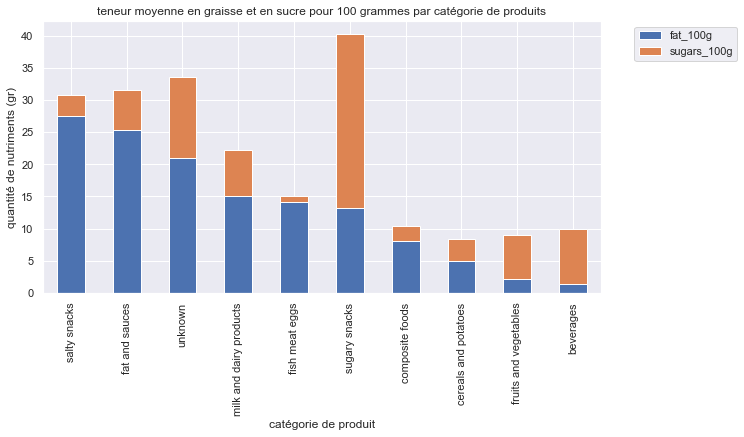

In [28]:
data_.groupby('pnns_groups_1').agg({'fat_100g':'mean','sugars_100g':'mean'}).sort_values(by='fat_100g', ascending=False).plot(kind='bar',stacked=True)
plt.xlabel("catégorie de produit")
plt.ylabel("quantité de nutriments (gr)")
plt.title('teneur moyenne en graisse et en sucre pour 100 grammes par catégorie de produits')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left') ; # position de la legende


### 2.2  Corrélation entre le pnns_groups_1 et sugars_100g , fat_100g

Y-a t-il un lien entre la catégorie de produits et la quantité de graisses par 100 grammes ?\
Et entre entre la catégorie de produits et la quantité de sucre par 100 grammes ?

In [29]:
import statsmodels.formula.api as smf
anova_pnns_groups_1 = smf.ols('fat_100g~pnns_groups_1', data=data_).fit()
print(anova_pnns_groups_1.summary())

                            OLS Regression Results                            
Dep. Variable:               fat_100g   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     2292.
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:02:09   Log-Likelihood:            -1.9449e+05
No. Observations:               49903   AIC:                         3.890e+05
Df Residuals:                   49893   BIC:                         3.891e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [30]:
import statsmodels.formula.api as smf
anova_pnns_groups_1 = smf.ols('sugars_100g~pnns_groups_1', data=data_).fit()
print(anova_pnns_groups_1.summary())

                            OLS Regression Results                            
Dep. Variable:            sugars_100g   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     956.9
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:02:09   Log-Likelihood:            -1.9880e+05
No. Observations:               49903   AIC:                         3.976e+05
Df Residuals:                   49893   BIC:                         3.977e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

Les résultats des tests d'anova indiquent que:

pvalue< 5%  donc on rejette  l'hypothèse H0 selon laquelle les moyennes sont semblables .

Il y a ici un lien significatif entre la quantité de graisse par 100g (fat_100g) et  la catégorie d'aliment( pnns_groups_1)

De même , il y a un lien signifcatif entre la quantité de sucre par 100g(sugars_100g) et  la catégorie d'aliment( pnns_groups_1)

Regardons à présent la présence de valeurs hautes pour le sucre dans les différentes catégories.

On observe de nombreux outliers qui correspondent à des produits à teneur en sucre trop élevées. Donc l'application devrait être en mesure de proposer dans chaque catégorie un ou plusieurs produits à teneur en sucre réduite.

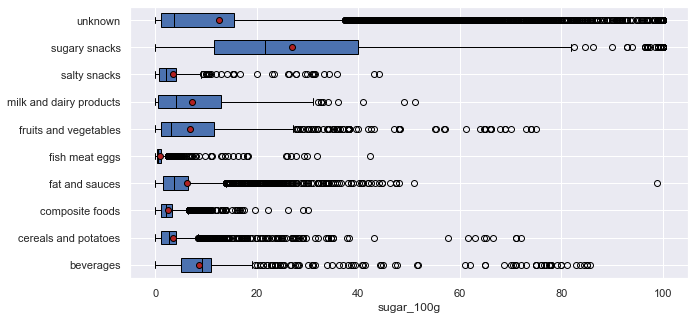

In [31]:
X = "pnns_groups_1" # qualitative
Y = "sugars_100g" # quantitative

modalites = data_.sort_values(by=['pnns_groups_1'])["pnns_groups_1"].unique()

groupes = []
for m in modalites:
    groupes.append(data_[data_[X]==m][Y])

# Propriétés graphiques     
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=True, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel('sugar_100g')
plt.show()

On peut faire la même vérification pour la contenance en graisse

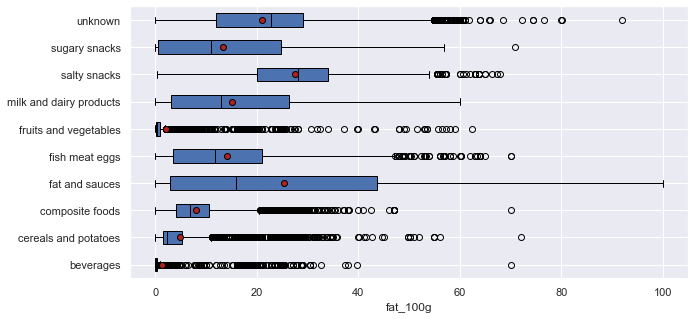

In [32]:
X = "pnns_groups_1" # qualitative
Y = "fat_100g" # quantitative

modalites = data_.sort_values(by=['pnns_groups_1'])["pnns_groups_1"].unique()

groupes = []
for m in modalites:
    groupes.append(data_[data_[X]==m][Y])

# Propriétés graphiques     
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=True, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel("fat_100g")
plt.show()

### 2.3 Corrélation entre la catégorie d'aliments(pnns_groups_1)   et la valeur du nutrition_grade_fr                       

Nombre de modalités: 5
Répartition des observations par modalité pnns_groups_1


,nombre_observations
nutrition_grade_fr,
d,11870
c,11050
a,9473
b,8273
e,6073


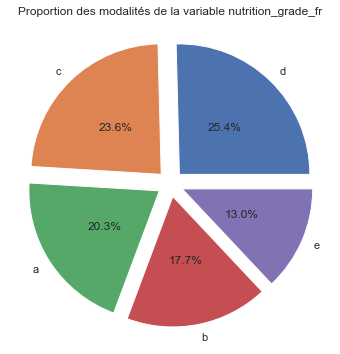

In [33]:
print(f"Nombre de modalités: {data_['nutrition_grade_fr'].nunique()}")
nutriscore_grade_ = data_.loc[:,["product_name","nutrition_grade_fr"]].groupby("nutrition_grade_fr").agg("count")
nutriscore_grade_.rename(mapper={"product_name":"nombre_observations"}, axis=1, inplace=True)
nutriscore_grade_.sort_values("nombre_observations", ascending= False, inplace = True)
print("Répartition des observations par modalité pnns_groups_1")
display(nutriscore_grade_)

pie, ax = plt.subplots(figsize=(10,6))
labels = nutriscore_grade_.index
plt.pie(x=nutriscore_grade_["nombre_observations"], autopct="%.1f%%", explode=[0.1]*5, labels=labels, pctdistance=0.5)
plt.title("Proportion des modalités de la variable nutrition_grade_fr")
plt.show()

On peut faire une tableau de contingence pour une meilleure visibilité

In [34]:
contigency= pd.crosstab(data_['nutrition_grade_fr'], data_['pnns_groups_1'])
contigency

pnns_groups_1,beverages,cereals and potatoes,composite foods,fat and sauces,fish meat eggs,fruits and vegetables,milk and dairy products,salty snacks,sugary snacks,unknown
nutrition_grade_fr,,,,,,,,,,
a,116,2239,1138,70,424,2141,355,34,41,2915
b,426,666,1547,168,572,457,884,43,234,3276
c,1208,444,1352,627,1278,168,1269,217,335,4152
d,645,196,788,873,1337,3,2122,421,460,5025
e,1317,15,53,275,903,0,165,37,197,3111


''

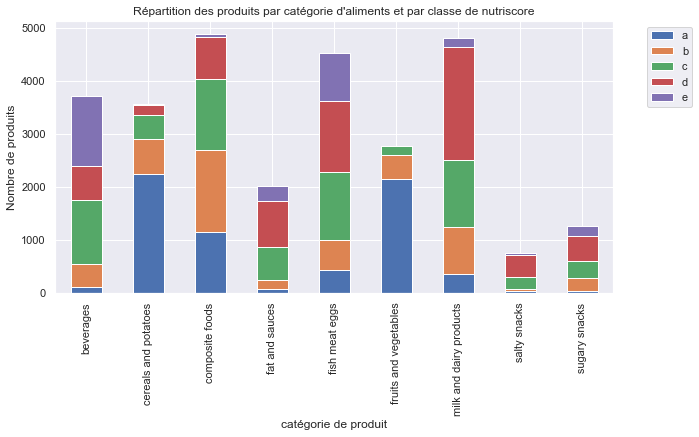

In [35]:
data_.loc[data_['pnns_groups_1']!='unknown'].groupby(['pnns_groups_1','nutrition_grade_fr']).count()['code'].unstack(level=1).plot(kind='bar',stacked=True)
plt.xlabel("catégorie de produit")
plt.ylabel("Nombre de produits")
plt.title("Répartition des produits par catégorie d'aliments et par classe de nutriscore")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left') ; # position de la legende
;

Y-a-t-il un lien entre la classe du nutrition_grade et la catégorie d'aliments?

Effectuons un test du khi deux pour vérifier l'indépendance des 2 variables.

hypothèse nulle H0 : il n'y a pas de relation entre la classe du nutrition_grade et la catégorie de d'aliments. Les variables sont indépendantes

hypothèse alternative H1 : il y a  un lien entre la classe du nutrition_grade et la catégorie de d'aliments.Les variables sont dépendantes

H0 : les variables sont indépendantes (et dans ce cas,la p-value calculée sera >= 5%)

H1 : les variables ne sont pas indépendantes (la p-value calculée sera < 5% )

In [36]:
from scipy.stats import chi2_contingency
# Chi-square test of independence.
c, p, dof, expected = chi2_contingency(contigency)
p

0.0

#### conclusion :
la valeur de p(=0) est < 0.05 --> On rejete H0 , l'hypothèse que les 2 variables sont indépendantes. Le test démontre un très fort lien entre la classe du nutrition_grade et la catégorie de d'aliment.

Ces deux variables ne sont, donc, pas indépendantes, mais étroitement liées.

### 2.4 Corrélation avec la valeur du nutrition_score


In [37]:
data_['nutrition_score'].describe(include='all')

count    46739.000000
mean         6.766405
std          8.415483
min        -15.000000
25%          0.000000
50%          5.000000
75%         13.000000
max         36.000000
Name: nutrition_score, dtype: float64

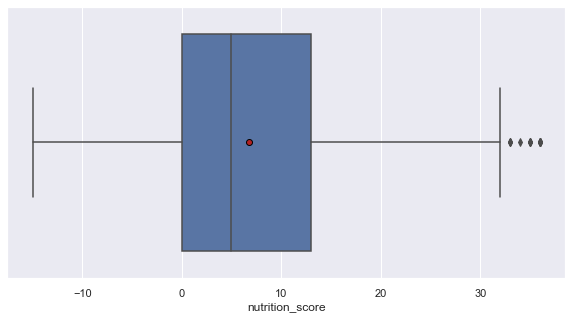

In [38]:
# Propriétés graphiques     
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

sns.boxplot(data_['nutrition_score'], showfliers=True,  showmeans=True, meanprops=meanprops)
plt.show()

<AxesSubplot:xlabel='nutrition_score', ylabel='Density'>

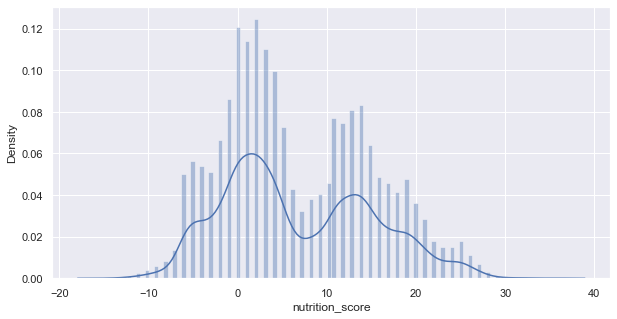

In [39]:
sns.distplot(data_['nutrition_score'],kde=True,bins=100)

###  3. ACP sur le jeu de données

In [40]:
data_acp=data.copy()

In [41]:
data_acp['code']=data_acp['code'].astype("object")

In [42]:
data_acp.sample(5)

,code,url,created_datetime,product_name,brands,categories,ingredients_text,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,...,main_category_fr,energy_100g,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutrition_score
35709,3596710336739,http://world-fr.openfoodfacts.org/produit/3596...,2012-10-11,Pâte feuilletée Bio,Auchan,"Pie dough,Puff pastry sheets","Farine de blé 44,5%* (_gluten_), margarine* (h...",1.0,1.0,0.0,...,Pâtes à tarte,1607.0,21.00,10.10,39.20,3.3,0.00,5.8,0.433071,18.0
275,80480280017,http://world-fr.openfoodfacts.org/produit/0080...,2017-03-05,Grey Goose Vodka,Migros grey,non connue,non disponible,1.0,0.0,0.0,...,unknown,126.0,0.66,0.00,4.86,3.0,0.00,0.0,0.000000,0.0
3213,26044163,http://world-fr.openfoodfacts.org/produit/2604...,2014-11-05,Cornichons Croquants (Extra Fins),Regalo,"Aliments et boissons à base de végétaux,Alimen...",Cornichons (conservateur : _métabisulfite_ de ...,1.0,0.0,0.0,...,Pickles,63.0,0.40,0.10,0.60,0.6,1.92,1.2,0.688976,2.0
27132,3372900900054,http://world-fr.openfoodfacts.org/produit/3372...,2017-02-20,Mousse Au Chocolat Noir Bio,Marie morin,non connue,non disponible,1.0,0.0,0.0,...,unknown,1397.0,27.74,15.00,43.12,17.0,0.00,8.6,0.122047,18.0
28559,3431590000809,http://world-fr.openfoodfacts.org/produit/3431...,2015-09-27,Préparation aux fruits abricot,Danival,"Fruits et produits dérivés,Préparations aux fr...","Abricots (52,3 %), jus de raisin concentré rec...",1.0,0.0,0.0,...,Aliments et boissons à base de végétaux,636.0,0.10,0.01,36.10,35.6,1.30,0.5,0.003937,6.0


In [43]:
#### REM 1 j'enleve nutrition_score 


In [44]:
#data_acp=data_acp[~data_acp['nutrition_score'].isna()]
# j'enlève les variables discrètes qui ne donnent pas de bons résultats lors de l'ACP
data_acp=data_acp.drop(['additives_n','ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n'],axis=1)
data_acp=data_acp.drop('nutrition_score',axis=1)

In [45]:
data_acp.shape

(49903, 19)

In [46]:
data_in=data_acp.copy()

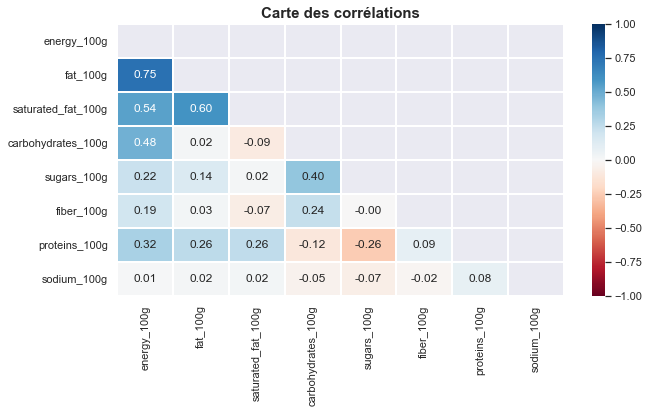

In [47]:

correlation_matrice(data_in)

### Utilisation de l'ACP pour la réduction de dimensions

La propriété de l'ACP de capter une partie importante de la variance des données à partir de moins de variables est particulièrement intéressante dans le domaine du Machine Learning pour être capable de fournir des prédictions avec des modèles plus légers (car utilisant moins de variables) et des résultats au moins aussi performants.

## Préparation des données pour l'ACP

In [48]:
 data_in['code'].sample()

31809    3560070696673
Name: code, dtype: object

In [49]:
data_in.set_index('product_name', inplace=True)

In [50]:
data_in.sample()

,code,url,created_datetime,brands,categories,ingredients_text,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category_fr,energy_100g,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g
product_name,,,,,,,,,,,,,,,,,,
Schweppes Framboise,3124480182135,http://world-fr.openfoodfacts.org/produit/3124...,2014-09-15,Schweppes,"soda,boisson","eau gazéifiée, sucre, acidifiant : acide citri...",d,Beverages,Sweetened beverages,Sodas,105.0,0.0,0.0,6.0,6.0,1.24,0.0,0.0


In [51]:

X = data_in.select_dtypes('float64') 
print('X', X.shape)

y = data_in.index
print('y', y.shape)




X (49903, 8)
y (49903,)


<AxesSubplot:ylabel='valeur par 100g'>

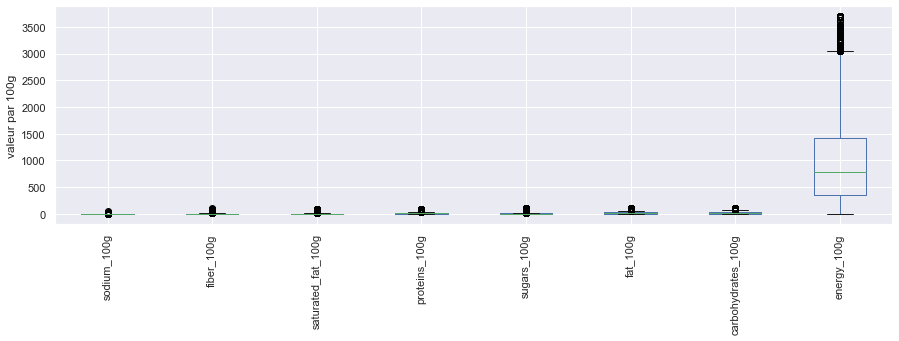

In [52]:
sort_by_mean = X.mean().sort_values(ascending=True)
X[sort_by_mean.index].plot(kind='box', figsize=(15, 4), rot=90, ylabel='valeur par 100g')

### normalisation centrée-réduite aux données

Pour certaines variables les niveaux d’expression varient beaucoup, pour d’autres non. Les plages de valeurs sont différentes  Cette situation peut impacter fortement l’analyse en composantes principales (ACP) qui est principalement basée sur la variance. Les variables avec une forte variance absolue auront plus de poids dans l’analyse que ceux avec une faible variance. Pour cette raison, les données doivent être obligatoirement normalisées (standardisées) avant l’analyse.

In [53]:
###standardisation avec normalisation centrée réduite
scaler = StandardScaler() # instanciation de l'objet scaler
X_scaled = scaler.fit_transform(X) # normalisation centrée-réduite
X_scaled = pd.DataFrame(X_scaled, index=X.index, columns=X.columns) # conversion du résultat en objet dataframe de pandas

<AxesSubplot:ylabel='valeur par 100g'>

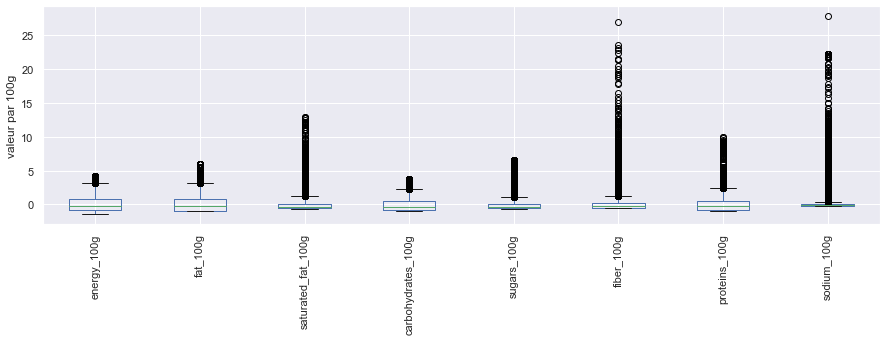

In [54]:
X_scaled.plot(kind='box', figsize=(15, 4), rot=90, ylabel='valeur par 100g')

In [55]:
### REM2 voir les valeurs catégories et la valeur corrélée energy_100g

###  Calcul de l'ACP

In [56]:
model_acp = PCA() # instanciation de l'objet pca
X_acp = model_acp.fit_transform(X_scaled) # réalisation de l'ACP sur les données X_scaled

In [57]:
# Conversion en dataframe pandas
acp_columns = ['PC' + str(c) for c in range(1, X_acp.shape[1]+1, 1)] # création d'une liste avec les noms de colonnes de PC1 à PC12
X_acp = pd.DataFrame(X_acp, index=X.index, columns=acp_columns) # création du dataframe
X_acp.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
product_name,,,,,,,,
Mini Confettis,1.957663,4.588435,-2.297885,0.916094,-0.359127,2.675177,-0.385716,0.198682
Praliné Amande Et Noisette,2.728547,2.143694,-0.646089,0.140623,0.030545,1.702042,-0.982066,0.818486
"Pepsi, Nouveau goût !",-1.893925,0.276907,-0.709695,-0.086831,0.185479,0.013309,0.123884,0.097054
Tarte Poireaux Et Lardons,1.116809,-0.445906,-0.327120,-0.179800,0.294137,-0.723371,0.017201,-0.614811
7Up,-1.893574,0.274174,-0.706642,-0.070655,0.187044,0.013281,0.124014,0.096991
Beignets framboises,0.690149,0.830282,-0.448257,0.130956,-0.517117,-0.459449,-0.745438,-0.303449
Carrot & Coriander soup,-1.936667,-0.242694,-0.386990,-0.126637,0.524475,-0.170129,0.076217,0.074010
Black & White Crispbread Sticks,1.649326,1.156307,2.449414,-0.043705,0.053136,-0.169899,-0.337274,-0.309143
Masala Ketchup,-0.755717,0.718162,-0.290763,0.122472,0.654034,0.483129,-0.419351,-0.382973


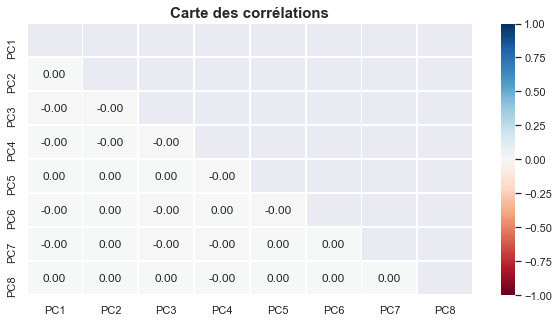

In [58]:
correlation_matrice(X_acp)

les variables sont tout à fait décorrelées suite à l'acp.

### Calcul de la variance expliquée

Les valeurs de la variance expliquée par composante se trouvent dans l’attribut pca.explained_variance_ratio_ après le calcul de l'ACP.

In [59]:
# Attribut du modele PCA pour retrouver la quantité de variance expliquée par chaque composante
model_acp.explained_variance_

array([2.508134  , 1.66043429, 1.14769386, 0.97827868, 0.67621986,
       0.5421527 , 0.39592095, 0.09132596])

In [60]:
# Attribut du modele PCA pour retrouver le pourcentage de variance expliquée par chaque composante
model_acp.explained_variance_ratio_

array([0.31351047, 0.20755013, 0.14345886, 0.12228238, 0.08452579,
       0.06776773, 0.04948913, 0.01141552])

In [61]:
# pour voir le pourcentage de variance qu'on peut expliquer en utilisant un certain nombre de variables (variance cumulée)
model_acp.explained_variance_ratio_.cumsum()

array([0.31351047, 0.52106059, 0.66451945, 0.78680184, 0.87132763,
       0.93909536, 0.98858448, 1.        ])

Les 4eres composantes principales expliquent 78% de la variance

In [62]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

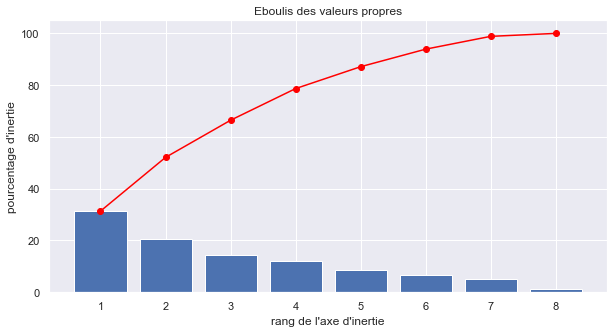

In [63]:
display_scree_plot(model_acp)

In [64]:
# attribut pour retrouver le poids de chaque composante au niveau de chaque axe

model_acp.components_[0]

array([0.59117608, 0.54154187, 0.4590363 , 0.2019248 , 0.15049772,
       0.1095698 , 0.26582261, 0.02094115])

Le tableau numpy résultant de l'attribut component_ d'un modele ACP nous indique dans quelle mesure le vecteur de chaque composante principale est affectée par chaque variable originelle. Ici on a :\

Composante principale 1 =0.59117608 *energy_100g + 0.54154187 * fat_100g + 0.4590363 * saturated_fat ....



### Je vais conserver les 4 premières composantes principales . 78 % de la variance sont expliquées par ces 4  composantes principales

In [65]:
df_acp=pd.DataFrame(X_acp,index=X.index,columns=['PC1','PC2','PC3','PC4'])

df_acp.head()

,PC1,PC2,PC3,PC4
product_name,,,,
Mini Confettis,1.957663,4.588435,-2.297885,0.916094
Praliné Amande Et Noisette,2.728547,2.143694,-0.646089,0.140623
"Pepsi, Nouveau goût !",-1.893925,0.276907,-0.709695,-0.086831
Tarte Poireaux Et Lardons,1.116809,-0.445906,-0.327120,-0.179800
7Up,-1.893574,0.274174,-0.706642,-0.070655


## Représentation des individus – ACP

In [66]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 2premiers plans factoriels, donc les 4 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(10,10))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        


In [67]:
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(9,9))
        
            # affichage des points
            if illustrative_var is None:
                 plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=0.4)
                    
                    
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=0.8, label=value)
                plt.legend()

            
                
                
            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

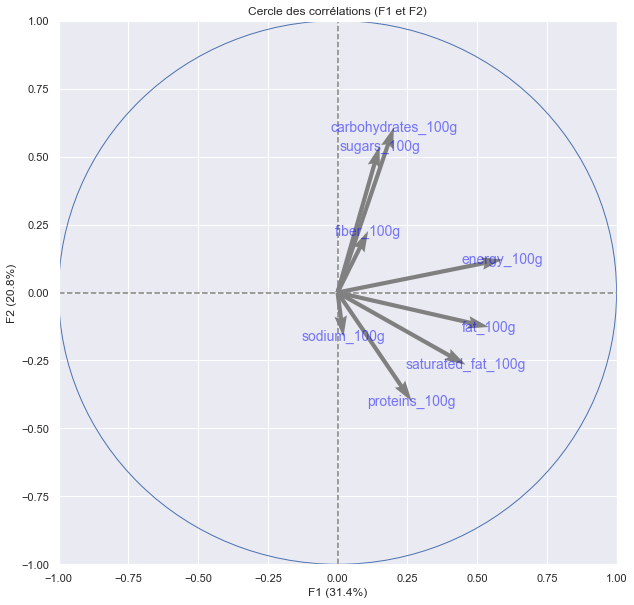

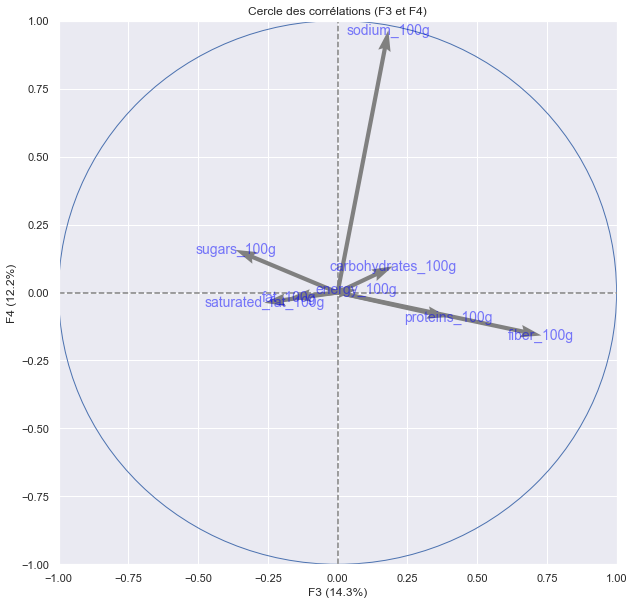

In [68]:
# Cercle des corrélations
n_comp=4
pca=model_acp
features = X.columns
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))


###  Observations :
        
**1er plan vectoriel :**

energy-kcal_100g , fat_100g et saturated-fat_100g ont une forte corrélation positive avec la composante F1

carbohydrates_100g ,sugar_100g et fiber_100g ont une corrélation négative avec la composante F2

nutrition_score est pratiquement perpendiculaire à sugar_100g et à carbohydrates_100g la corrélation entre eux est quasi inexistante.
Il n'y a pas de variable anti-correlée avec la composante F1

**2eme plan vectoriel :**

sodium_100g a une très forte corrélation  avec la composante principale F4
fiber_100g a une forte corrélation avec la composante principale F3

fat_100g , saturated_fat_100g et sugars_100g ont une corrélation négative avec la composante F3


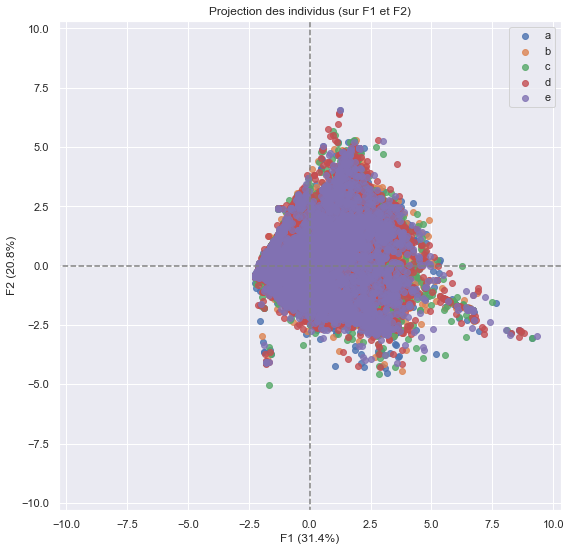

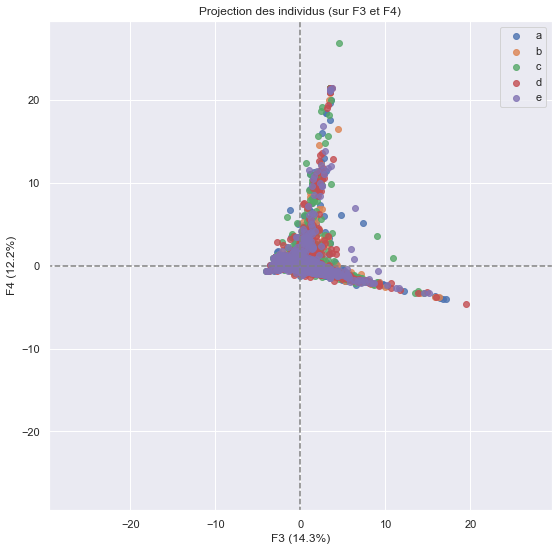

In [69]:
data_sc=data.copy()
data_sc['nutrition_grade_fr']=data_sc['nutrition_grade_fr'].astype("category")
nutriscore_index=data_sc.select_dtypes('float64').drop('nutrition_score',axis=1).dropna().index
nutrition_grade=data_sc['nutrition_grade_fr'].loc[nutriscore_index]
#nutrition_grade=nutrition_grade.cat.add_categories('Inconnu').fillna('Inconnu')
#inconnu_index=nutrition_grade[nutrition_grade=='Inconnu'].index
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], labels = None,illustrative_var=nutrition_grade[nutrition_grade.notna()])

plt.show()

In [70]:
#X_projected = pca.transform(X_scaled)
#display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], alpha = 0.5,illustrative_var=nutrition_grade[nutrition_grade!='Inconnu'])


In [71]:
df_acp.head(10)

,PC1,PC2,PC3,PC4
product_name,,,,
Mini Confettis,1.957663,4.588435,-2.297885,0.916094
Praliné Amande Et Noisette,2.728547,2.143694,-0.646089,0.140623
"Pepsi, Nouveau goût !",-1.893925,0.276907,-0.709695,-0.086831
Tarte Poireaux Et Lardons,1.116809,-0.445906,-0.327120,-0.179800
7Up,-1.893574,0.274174,-0.706642,-0.070655
Beignets framboises,0.690149,0.830282,-0.448257,0.130956
Carrot & Coriander soup,-1.936667,-0.242694,-0.386990,-0.126637
Black & White Crispbread Sticks,1.649326,1.156307,2.449414,-0.043705
Masala Ketchup,-0.755717,0.718162,-0.290763,0.122472


### constatation de l'acp

l'ACP a permis de réduire le nombre de colonnes.Les 4 premières composantes principales captent 78% de l'inertie.
Le nombre de variables étaient déjà réduit avant l'acp.

les nutriments sodium_100g,fat_100g, saturated_fat_100g et proteins_100g sont situés dans le même quartier du 1er plan factoriel
fibers_100g,carbohydrates_100g et sugars_100g sont groupés dans un autre quartier du 1er plan factoriel. De plus ils sont fortement correlés.
On a donc 2 groupes bien distincts

Il est difficile de donner une interprétation plus précise de la position des variables sur les plans factoriels.(Il manque l'aspect métier pour cette analyse)



Idée de projet:

In [99]:
data.loc[data['product_name'].str.contains('Mousse au chocolat')][['code','product_name','sugars_100g','fat_100g','energy_100g']]

,code,product_name,sugars_100g,fat_100g,energy_100g
877,2000000017973,Mousse au chocolat à l'ancienne,19.2,25.400,1463.0
1162,20020569,Mousse au chocolat au lait,20.7,5.900,670.0
6867,3083681037432,Formule Salade + Dessert Poulet mariné + Mouss...,5.5,10.000,722.0
10997,3222476107282,"Mousse au chocolat, Noir et Lait",19.0,20.960,653.0
12332,3245412730566,Mousse au chocolat,19.0,20.860,699.0
13538,3250390792550,Mousse au chocolat,19.0,6.300,695.0
14651,3250392154332,Mousse au chocolat au lait,19.0,6.400,714.0
14850,3250395012080,Mousse au chocolat au lait,19.9,6.300,718.0
14982,3252920039395,Mousse au chocolat noir,17.0,25.000,1431.0
14985,3252920039470,Mousse au chocolat noir,23.5,25.600,1500.0
